<a href="https://colab.research.google.com/github/prakhar-chaurasiya/AP2021/blob/main/PVV_BANKNIFTY_AWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT FUNCTIONS

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
!pip install kiteconnect
from kiteconnect import KiteConnect
from kiteconnect.exceptions import TokenException

# import all functions
import sys
sys.path.insert(0, '/content/drive/MyDrive/data')
# from all_functions import *

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 8.8 MB/s eta 0:00:00


# login to zerodha

In [2]:
import logging
from getDetails import getA
from getDetails import getS
from getDetails import getK
from getDetails import getMarginAmount
  

#logging.basicConfig(level=logging.DEBUG)
#logging.disable(logging.CRITICAL);

kite = KiteConnect(api_key=getK())

kite.login_url()
print(kite.login_url())

# Redirect the user to the login url obtained
# from kite.login_url(), and receive the request_token
# from the registered redirect url after the login flow.
# Once you have the request_token, obtain the access_token
# as follows.


https://kite.zerodha.com/connect/login?api_key=5l75fudhbt8xux1o&v=3


In [7]:
try:
  with open('/content/drive/MyDrive/data/access_token.txt','r') as at:
    aToken = at.readline()
  kite.set_access_token(aToken)
  print(kite.quote('NSE:INFY'))
except TokenException:
  print('SET ACCESS TOKEN!!')
  data = kite.generate_session(getA(), api_secret=getS())
  aToken=data['access_token']
  # print(aToken)
  kite.set_access_token(aToken)
  with open('/content/drive/MyDrive/data/access_token.txt','w') as at:
    at.write(kite.access_token)
  print(kite.quote('NSE:INFY'))

{'NSE:INFY': {'instrument_token': 408065, 'timestamp': datetime.datetime(2023, 2, 24, 9, 26, 27), 'last_trade_time': datetime.datetime(2023, 2, 24, 9, 26, 23), 'last_price': 1563.75, 'last_quantity': 1, 'buy_quantity': 185615, 'sell_quantity': 299071, 'volume': 301848, 'average_price': 1564, 'oi': 0, 'oi_day_high': 0, 'oi_day_low': 0, 'net_change': 0, 'lower_circuit_limit': 1395.65, 'upper_circuit_limit': 1705.75, 'ohlc': {'open': 1560, 'high': 1569, 'low': 1559, 'close': 1550.7}, 'depth': {'buy': [{'price': 1563.75, 'quantity': 20, 'orders': 4}, {'price': 1563.7, 'quantity': 29, 'orders': 2}, {'price': 1563.65, 'quantity': 19, 'orders': 1}, {'price': 1563.6, 'quantity': 65, 'orders': 2}, {'price': 1563.55, 'quantity': 3, 'orders': 3}], 'sell': [{'price': 1564, 'quantity': 231, 'orders': 11}, {'price': 1564.05, 'quantity': 29, 'orders': 1}, {'price': 1564.2, 'quantity': 202, 'orders': 7}, {'price': 1564.3, 'quantity': 131, 'orders': 16}, {'price': 1564.35, 'quantity': 204, 'orders': 2}

In [9]:
kite.quote('NSE:NIFTY BANK')

{'NSE:NIFTY BANK': {'instrument_token': 260105,
  'tradingsymbol': 'NIFTY BANK',
  'timestamp': datetime.datetime(2023, 2, 21, 18, 34, 28),
  'last_price': 40673.6,
  'net_change': -28.1,
  'ohlc': {'open': 40784.9,
   'high': 40946.2,
   'low': 40508.25,
   'close': 40701.7}}}

In [19]:
kite.quote('NFO:BANKNIFTY23FEB40000CE')

{'NFO:BANKNIFTY23FEB40000CE': {'instrument_token': 14803714,
  'timestamp': datetime.datetime(2023, 2, 21, 17, 34, 17),
  'last_trade_time': datetime.datetime(2023, 2, 21, 15, 29, 59),
  'last_price': 772,
  'last_quantity': 50,
  'buy_quantity': 252175,
  'sell_quantity': 13675,
  'volume': 2750425,
  'average_price': 780.46,
  'oi': 394975,
  'oi_day_high': 432925,
  'oi_day_low': 365925,
  'net_change': 0,
  'lower_circuit_limit': 0.05,
  'upper_circuit_limit': 2498.3,
  'ohlc': {'open': 848.35, 'high': 1003, 'low': 631.5, 'close': 841.1},
  'depth': {'buy': [{'price': 770, 'quantity': 50, 'orders': 1},
    {'price': 766, 'quantity': 500, 'orders': 1},
    {'price': 765.05, 'quantity': 50, 'orders': 1},
    {'price': 765, 'quantity': 150, 'orders': 1},
    {'price': 762.4, 'quantity': 50, 'orders': 1}],
   'sell': [{'price': 776.85, 'quantity': 50, 'orders': 1},
    {'price': 776.95, 'quantity': 75, 'orders': 1},
    {'price': 777, 'quantity': 500, 'orders': 1},
    {'price': 777.15

# connect to aws database

```python
import sqlite3
con = sqlite3.connect("/content/drive/MyDrive/data/PVV.db")
cur = con.cursor()

# Below table stores input raw data to tables which is used in turn to perform IV calculations

# cur.execute('''CREATE TABLE Market_NFO_Data(tick_timestamp, symbol, weights, lots, steps, contract, ltp, 
# atm_num, ce_ltp, ce_avg_price, ce_buy_quantity, ce_sell_quantity,  ce_volume, ce_oi, pe_ltp,
#        pe_avg_price, pe_buy_quantity, pe_sell_quantity, pe_volume,
#        pe_oi, IV_CE, IV_PE, ce_buy_price1, ce_buy_qty1,
#        ce_buy_orders1, ce_buy_price2, ce_buy_qty2, ce_buy_orders2,
#        ce_buy_price3, ce_buy_qty3, ce_buy_orders3, ce_buy_price4,
#        ce_buy_qty4, ce_buy_orders4, ce_buy_price5, ce_buy_qty5,
#        ce_buy_orders5, ce_sell_price1, ce_sell_qty1, ce_sell_orders1,
#        ce_sell_price2, ce_sell_qty2, ce_sell_orders2, ce_sell_price3,
#        ce_sell_qty3, ce_sell_orders3, ce_sell_price4, ce_sell_qty4,
#        ce_sell_orders4, ce_sell_price5, ce_sell_qty5, ce_sell_orders5,
#        pe_buy_price1, pe_buy_qty1, pe_buy_orders1, pe_buy_price2,
#        pe_buy_qty2, pe_buy_orders2, pe_buy_price3, pe_buy_qty3,
#        pe_buy_orders3, pe_buy_price4, pe_buy_qty4, pe_buy_orders4,
#        pe_buy_price5, pe_buy_qty5, pe_buy_orders5, pe_sell_price1,
#        pe_sell_qty1, pe_sell_orders1, pe_sell_price2, pe_sell_qty2,
#        pe_sell_orders2, pe_sell_price3, pe_sell_qty3, pe_sell_orders3,
#        pe_sell_price4, pe_sell_qty4, pe_sell_orders4, pe_sell_price5,
#        pe_sell_qty5, pe_sell_orders5, free_text_1 DEFAULT 0.00, free_text_2 DEFAULT 0.00)''')
# cur.execute("CREATE TABLE IV_NFO_Data(tick_timestamp,CE_IV_Diff, PE_IV_Diff)")

# cur.execute("CREATE UNIQUE INDEX idx_market_NFO ON Market_NFO_Data (tick_timestamp, symbol)")
# cur.execute("CREATE UNIQUE INDEX idx_IV_NFO ON IV_NFO_Data (tick_timestamp)")



# buyprice1,buyprice2,buyprice3,buyprice4,buyprice5,buyqty1,buyqty2,buyqty3,buyqty4,buyqty5,buyord1,buyord2,buyord3,buyord4,buyord5,sellprice1,sellprice2,sellprice3,sellprice4,sellprice5,sellqty1,sellqty2,sellqty3,sellqty4,sellqty5,sellord1,sellord2,sellord3,sellord4,sellord5,

# cur.execute("CREATE TABLE Market_Data_del(tick_timestamp,symbol,weights,lots,steps,ltp,atm,ce_ltp,pe_ltp,IV_CE,IV_PE)")
# cur.execute("CREATE TABLE IV_Data_del(tick_timestamp,IV_Diff)")
# cur.execute("CREATE TABLE IV_Data_PEdel(tick_timestamp,IV_Diff)")

# cur.execute('DROP TABLE Market_NFO_Data')
# cur.execute('DROP TABLE IV_NFO_Data')

# cur.execute('Drop table OMS_Data')
# cur.execute('''CREATE TABLE OMS_Data(tick_timestamp,Signal_Type,Processed_Flg,margin_amount,buy_option_preminum,sell_option_premium,
#              Number_of_stocks,strategy_multiplier,HV1,HV2,HV3,HV4,HV5,HV6,HV7,HV8,HV9,HV10,
#              HV1_ce_avg,HV2_ce_avg,HV3_ce_avg,HV4_ce_avg,HV5_ce_avg,HV6_ce_avg,HV7_ce_avg,HV8_ce_avg,HV9_ce_avg,HV10_ce_avg,NIFTY_ce_avg,
#               HV1_pe_avg,HV2_pe_avg,HV3_pe_avg,HV4_pe_avg,HV5_pe_avg,HV6_pe_avg,HV7_pe_avg,HV8_pe_avg,HV9_pe_avg,HV10_pe_avg,NIFTY_pe_avg,
#               pnl, pnl_percentage,
#               free_text_1,free_text_2,free_text_3)''')
# cur.execute("CREATE UNIQUE INDEX idx_OMS ON OMS_Data (tick_timestamp)")
```


In [3]:
# connect to database
!pip install pymysql
import pymysql
conn = pymysql.connect(
    host="rds-instance-pvv.ckgpbiiw4z6q.ap-northeast-1.rds.amazonaws.com",
    port=int(3306),
    user="admin",
    passwd="Newuser0123",
    db="rds_masterdb_PVV",
    charset='utf8mb4')
cur=conn.cursor()

# Market_Table = "Market_NFO_Data"
# OMS_Table = "OMS_Data"
# IV_Table = "IV_NFO_Data"
# PNL_Table = "PnL_Data"
Market_Table = "BN_Market_Test"
OMS_Table = "BN_OMS_Test"
IV_Table = "BN_IV_Test"
PNL_Table = "BN_PnL_Test"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.1 MB/s eta 0:00:00


# functions

In [4]:
from pytz import timezone 
import time
from datetime import timedelta, date, datetime
import calendar
import pandas as pd
import numpy as np
import math
#!pip install scipy
import scipy.stats
from numpy import sqrt,log,exp,pi

N = scipy.stats.norm.cdf

def bs_price(c_p,S,K,r,t,sigma):
  d1 = (log(S/K) + (r+sigma**2/2)*t) / (sigma*sqrt(t))
  d2 = d1 - sigma * sqrt(t) 
  if c_p == 'C':
    return N(d1) * S - N(d2) * K * exp(-r*t)
  elif c_p == 'P':
    return N(-d2) * K * exp(-r*t) - N(-d1) * S
  else:
    return "Please specify either CALL or PUT option"

MAX_TRY = 100
def find_iv_newton(c_p,S,K,r,t,market_price):
  _sigma=0.6      #Here 0.5 is just an arbitary number
  for i in range(MAX_TRY):
    _bs_price = bs_price(c_p,S,K,r,t,sigma=_sigma)
    diff = market_price - _bs_price
    N_prime=scipy.stats.norm.pdf
    d1 = (log(S/K) + (r+_sigma**2/2)*t) / (_sigma*sqrt(t))
    #print(f'd1: {d1}, Nprime: {N_prime}, t:{t}')

    vega = S * N_prime(d1)*sqrt(t)
    #print("Vega is:",diff)
    if abs(diff) < 0.001:
      return _sigma
    _sigma += diff/vega
    # _sigma += 0.25*diff/abs(diff)
  return _sigma


holidays = ['26-Jan-2023', '07-Mar-2023', '30-Mar-2023',
            '04-Apr-2023', '07-Apr-2023', '14-Apr-2023',
            '01-May-2023', '28-Jun-2023', '15-Aug-2023', 
            '19-Sep-2023', '02-Oct-2023', '24-Oct-2023',
            '14-Nov-2023', '27-Nov-2023', '25-Dec-2023']
            
h = []
for i in holidays:
    h.append(datetime.strptime(i, '%d-%b-%Y'))

def ex(c):
    if (c[:, 3][-1] != 0):
        ex = c[:, 3][-1]
        return ex
    else:
        ex = c[:, 3][-2]
        return ex

def expiry_day(t):
    d = t.day
    y = t.year
    m = t.month
    c = np.array(calendar.monthcalendar(y, m))
    e = ex(c)
    de = datetime(y, m, e)
 
    if de >= datetime(y, m, d):
        return de.strftime("%d")+de.strftime("%b").upper()+de.strftime("%y")
    else:
        c = np.array(calendar.monthcalendar(y, m+1))
        e = ex(c)
        de = datetime(y, m+1, e)
        if de in h:
            e = e-1
        if de >= datetime(y, m, d):
            return de.strftime("%d")+de.strftime("%b").upper()+de.strftime("%y") 

def expiry_in_days(t):
    d = t.day
    y = t.year
    m = t.month
 
    c = np.array(calendar.monthcalendar(y, m))
    e = ex(c)
    de = datetime(y, m, e)
    #print(de)
    if de >= datetime(y, m, d):
        return (de - datetime(y, m, d)).days/365
    else:
        c = np.array(calendar.monthcalendar(y, m+1))
        e = ex(c)
        de = datetime(y, m+1, e)
       
        if de >= datetime(y, m, d):
            return (de - datetime(y, m, d)).days/365

def time_to_expiry(t):
    y = t.year
    m = t.month
    c = np.array(calendar.monthcalendar(y, m))
    e = ex(c)
    de = datetime(y, m, e, 15, 30)
    if de >= t:
        return ((de - t)/timedelta(minutes=1)+1)/525600
    else:
        c = np.array(calendar.monthcalendar(y, m+1))
        e = ex(c)
        de = datetime(y, m+1, e, 15, 30)
        if de >= t:
            return ((de - t)/timedelta(minutes=1)+1)/525600

def zerodha_expiry_day_YYMON(t):
    d = t.day
    y = t.year
    m = t.month
    c = np.array(calendar.monthcalendar(y, m))
    e = ex(c)
    de = datetime(y, m, e)
 
    if de >= datetime(y, m, d):
        return de.strftime("%y")+de.strftime("%b").upper()
    else:
        c = np.array(calendar.monthcalendar(y, m+1))
        e = ex(c)
        de = datetime(y, m+1, e)
        if de in h:
            e = e-1
        if de >= datetime(y, m, d):
            return de.strftime("%y")+de.strftime("%b").upper()
            


def atmStrike(ltp, step=50, start=0):
  res = step*round(ltp/step) + start
  if res%1 == 0:
    return int(res)
  return str(res)

  
 
def ce_flatten_dict(x):
  flat = []
  for i in ce_quote[x]['depth']['buy']:
    for j in i.values():
      flat.append(j)
  for i in ce_quote[x]['depth']['sell']:
    for j in i.values():
      flat.append(j)
  return flat

def pe_flatten_dict(x):
  flat = []
  for i in pe_quote[x]['depth']['buy']:
    for j in i.values():
      flat.append(j)
  for i in pe_quote[x]['depth']['sell']:
    for j in i.values():
      flat.append(j)
  return flat

def ema(df, period=50):
  return pd.DataFrame.ewm(df, span=period, adjust=False).mean()

def crossover(df, period1=50, period2=200, typ='ce'):
  ema1 = typ+'_ema'+str(period1)
  ema2 = typ+'_ema'+str(period2)
  df[ema1] = ema(df[typ+'_iv_diff'], period=period1)
  df[ema2] = ema(df[typ+'_iv_diff'], period=period2)
  trend = typ+'_trend'
  # signal = typ+'_signal'
  signal = 'signal'
  df[trend] = (df[ema1].values>df[ema2].values).astype('int8')
  df[signal] = df[trend] - df[trend].shift(1)
  df = df.dropna()
  # df[signal] = df[signal].astype('int')
  df = df.astype({signal:int})
  return df
  
number_of_stocks=10

def getMargin(oms_stocks_data_temp, number_of_stocks = number_of_stocks, buy='BUY', sell='SELL', order_type='LIMIT'):
  df = pd.DataFrame(oms_stocks_data_temp)
  df.columns = ['symbol', 'ltp','lots', 'weights','steps', 'contract', 'atm_num', 'ce_ltp', 'pe_ltp', 'ce_buy_price1', 'ce_buy_qty1', 'ce_buy_price2', 'ce_buy_qty2', 'ce_buy_price3', 'ce_buy_qty3', 'ce_buy_price4', 'ce_buy_qty4', 'ce_buy_price5', 'ce_buy_qty5',
'ce_sell_price1', 'ce_sell_qty1', 'ce_sell_price2', 'ce_sell_qty2', 'ce_sell_price3', 'ce_sell_qty3', 'ce_sell_price4', 'ce_sell_qty4', 'ce_sell_price5', 'ce_sell_qty5',
'pe_buy_price1', 'pe_buy_qty1', 'pe_buy_price2', 'pe_buy_qty2', 'pe_buy_price3', 'pe_buy_qty3', 'pe_buy_price4', 'pe_buy_qty4', 'pe_buy_price5', 'pe_buy_qty5', 
'pe_sell_price1', 'pe_sell_qty1', 'pe_sell_price2', 'pe_sell_qty2', 'pe_sell_price3', 'pe_sell_qty3', 'pe_sell_price4', 'pe_sell_qty4', 'pe_sell_price5', 'pe_sell_qty5']
  df.loc[df['symbol'] == 'BANKNIFTY',['weights']] = df.loc[df['symbol'] != 'BANKNIFTY',['weights']].sum().values.item()
  df['qty'] = df['lots'] * df['weights']
  atm = list(map(lambda x: atmStrike(x[0], step = x[1]), zip(df['ltp'], df['steps'])))
  df['atm'] = atm
  df['atm'] = df['atm'].astype('str')
  # df['atm_num'] = df['atm_num'].apply(int)
  # df['atm_num'] = df['atm_num'].apply(str)
  df['contract'] = df['contract'].apply(lambda x: x[4:])
  df['ceticker'] = df['contract'] + df['atm'] + 'CE'
  df['peticker'] = df['contract'] + df['atm'] + 'PE'
  df['position'] = sell
  df.loc[df['symbol'] == 'BANKNIFTY',['position']] = buy

  order_param_basket = []
  for i in df.sort_values(by='position').values:

    order_param_basket.append(dict(exchange="NFO", 
                  tradingsymbol = i[-3], 
                  transaction_type = i[-1], 
                  variety = "regular", 
                  product = "NRML", 
                  price = i[7], 
                  order_type = order_type,
                  quantity = i[-5]))
    order_param_basket.append(dict(exchange ="NFO", 
                  tradingsymbol =i[-2], 
                  transaction_type = i[-1], 
                  variety = "regular", 
                  product = "NRML", 
                  price = i[8], 
                  order_type = order_type,
                  quantity = i[-5]))
    
  try:
    # print(order_param_basket)
    margin_amount = kite.basket_order_margins(order_param_basket)
    # margin_amount_comt = kite.basket_order_margins(order_param_basket, mode='compact')
    return margin_amount, df
  
  except Exception as e:
    #logging.info("Error fetching order margin: {}".format(e))
    print(e)
    return -1, df


  # return df

def f(qty, depth_qty, depth_price):
  if (qty <= depth_qty).bool():
    return depth_price, qty
  else:
    return depth_price, depth_qty


def depth_ltp(x, CEorPE='ce'):
  '''
  Trade_Type:  opposite side of the required trade
  '''
  trade_list = list()
  i = 0
  Trade_Type='sell'
  if (x['position'] == 'SELL').bool():
    Trade_Type='buy'
  depth_total = x[f'{CEorPE}_{Trade_Type}_qty{i+1}']
  org_qty = x['qty'].copy()
  req_qty = x['qty']
  first_qty=x[f'{CEorPE}_{Trade_Type}_qty{i+1}'].values.item() 
  first_price=x[f'{CEorPE}_{Trade_Type}_price{i+1}'].values.item() 
  price_qty = 0
  try:
    while (depth_total <= req_qty).bool():
      req_qty -= x[f'{CEorPE}_{Trade_Type}_qty{i+1}']
      i+=1
      depth_total = x[f'{CEorPE}_{Trade_Type}_qty{i+1}']
      price, qty = f(req_qty, x[f'{CEorPE}_{Trade_Type}_qty{i+1}'], x[f'{CEorPE}_{Trade_Type}_price{i+1}'])
      price_qty += price*qty
      trade_list.append(dict(quantity=qty.values.item() , price = price.values.item() ))
    if(i>0):
        price_qty += first_qty*first_price
        trade_list.insert(0, (dict(quantity=first_qty , price = first_price)))
    else:
        price_qty = req_qty*first_price
        trade_list.insert(0, (dict(quantity=req_qty.values.item() , price = first_price)))
    return (price_qty/org_qty).values.item(), trade_list
  except KeyError:
    print("Not Enough QTY")
    # pass
    if CEorPE =='ce':
      return x['ce_ltp'].values.item(), {}
    return x['pe_ltp'].values.item(), {}
    
    # update table,
    # insert into OMS data with procesed flag as 'E'

import matplotlib.pyplot as plt

def plot_ema(ema1, ema2):
  plt.figure(figsize=(20, 10))
  plt.plot(ema1, label=ema1.columns[0].upper())
  plt.plot(ema2, label=ema2.columns[0].upper())
  plt.legend()
  plt.show()

In [46]:
find_iv_newton('C', 40673.6, 40700, 0.0733, 0.005479452054794521, 229.90)

0.19553776874275702

# preprocessing

In [24]:
import pandas as pd
df = pd.read_excel('BankNifty.xlsx')
df

,symbol,Weight,Lots_size,step_size
0,BANKNIFTY,100,75,100.0
1,HDFCBANK,28,550,10.0
2,ICICIBANK,23,700,10.0
3,AXISBANK,10,1200,10.0
4,KOTAKBANK,10,400,20.0
5,SBIN,10,1500,5.0
6,INDUSINDBK,6,450,20.0
7,AUBANK,3,1000,10.0
8,BANKBARODA,3,5850,2.5
9,BANDHANBNK,2,1800,5.0


In [30]:
print('[', end='')
for i in df.step_size:
  print(f"{i},", end='')
print(']')

[100.0,10.0,10.0,10.0,20.0,5.0,20.0,10.0,2.5,5.0,1.0,1.0,1.0,]


In [14]:
###########                                         ###########
from datetime import timedelta, date, datetime

niftyList=['BANKNIFTY', 'HDFCBANK', 'ICICIBANK', 'AXISBANK', 'KOTAKBANK', 'SBIN',
'INDUSINDBK', 'AUBANK', 'BANKBARODA', 'BANDHANBNK', 'FEDERALBNK', 'IDFCFIRSTB', 'PNB']

niftyWeightList=[100,28,23,10,10,10,6,3,3,2,2,2,1]

niftyLotList = [75,550,700,1200,400,1500,450,1000,5850,1800,5000,15000,16000]

niftyStepStrikeList=[100,10,10,10,20,5,20,10,2.5,5,2.5,1,1]


####
#### Find future for all Nifty 50 stocks. Form symbol using X+Y+X, where X=Instrument, Y=Expiry in YYMON format, Z=FUT

expiry = zerodha_expiry_day_YYMON(date.today())
print(expiry)
# print(zerodha_expiry_day_YYMON(date.today())
NFO = list(map(lambda x: 'NFO:'+x+expiry+'FUT', niftyList))


23MAR


# insert data and signal generation


Streaming output truncated to the last 5000 lines.
202302241005S
PNL: 7790.00, 0.2225%, 3500864.56
Current Margin AMT: 3519315.1930
--------------------------------
PNL NOT SUFFICIENT QTY in ['BANKNIFTY']

2023-02-24 10:14
IV CE DIFF: 6.640
IV PE DIFF: 6.400

Not Enough QTY
Not Enough QTY
[1.85, 2.1, 767.75, 6.216666666666667, 10.025, 21.45]
[2.35, 1.75, 717.45, 6.55, 9.05, 21.9]
--------------------------------
202302241005S
PNL: -5348.75, -0.1528%, 3500864.56
Current Margin AMT: 3501498.3760
--------------------------------
PNL NOT SUFFICIENT QTY in ['BANKNIFTY']

2023-02-24 10:15
IV CE DIFF: 6.613
IV PE DIFF: 6.580

Not Enough QTY
Not Enough QTY
[1.9, 2.1, 727.7, 6.4, 10.15, 21.783333333333335]
[2.3, 1.75, 746.0, 6.35, 8.9, 21.516666666666666]
--------------------------------
202302241005S
PNL: -14303.75, -0.4086%, 3500864.56
Current Margin AMT: 3492824.9620
--------------------------------
PNL NOT SUFFICIENT QTY in ['BANKNIFTY']

2023-02-24 10:16
IV CE DIFF: 6.633
IV PE DIFF: 6.541

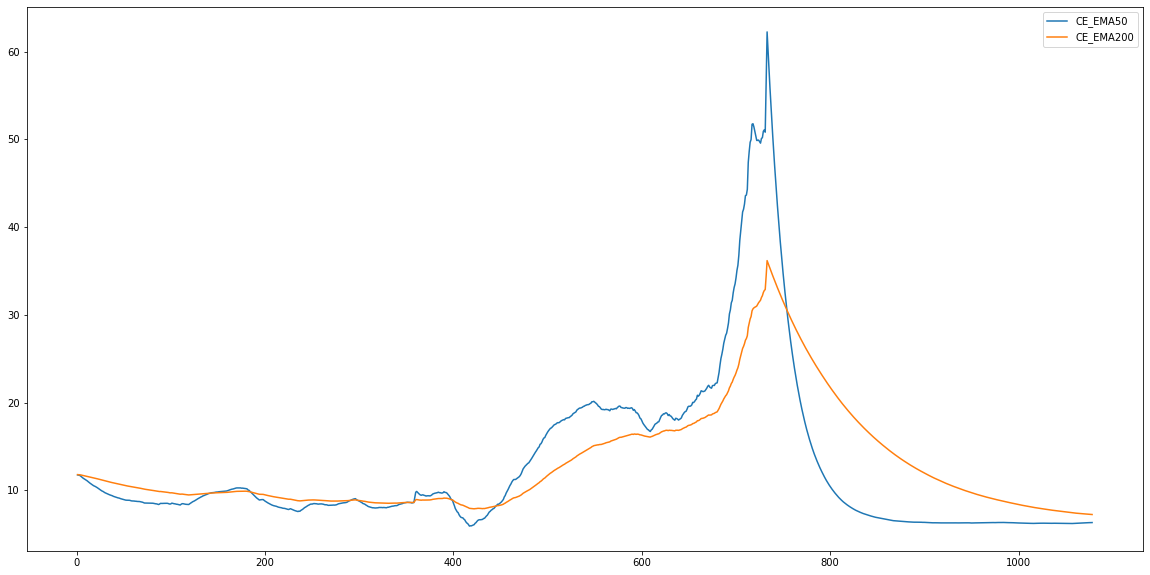

In [13]:
# final insert

from pytz import timezone 
from pymysql.err import ProgrammingError
import time
# datetime.now(timezone("Asia/Kolkata")).strftime('%Y-%m-%d %H:%M')
expiry = zerodha_expiry_day_YYMON(date.today())

def flatten_dict(x, quote=dict()):
  flat = []
  for i in quote[x]['depth']['buy']:
    for j in i.values():
      flat.append(j)
  for i in quote[x]['depth']['sell']:
    for j in i.values():
      flat.append(j)
  return flat

number_of_stocks = 5
strategy_multiplier = 1
t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)#.strftime('%Y-%m-%d %H:%M')
td = date.today()
_915 = datetime(year=td.year, month=td.month, day=td.day, hour=9, minute=15)
_1530 = datetime(year=td.year, month=td.month, day=td.day, hour=15, minute=30)
while True:
  try:
    print(f'{t:%Y-%m-%d %H:%M}')
    tic = time.time()
    if (t >= _915) and (t <= _1530):
      # t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)#.strftime('%Y-%m-%d %H:%M')
      niftyindex = pd.DataFrame([niftyList, niftyWeightList, niftyLotList, niftyStepStrikeList]).T
      niftyindex.columns = ['symbol', 'weights', 'lots', 'steps']
      niftyindex['tick_timestamp'] = t
      niftyindex['contract'] = niftyindex['symbol'].apply(lambda x: 'NFO:'+x+expiry)
      niftyindex['FUT'] = niftyindex['contract']+'FUT'
      niftyindex.sort_values('contract', axis=0, inplace=True)
      niftyindex.index = niftyindex['contract']
      ltp = pd.DataFrame(kite.quote(niftyindex['FUT'])).loc['last_price'].T
      ltp.index = niftyindex.index
      niftyindex['ltp'] = ltp
      niftyindex['start']=0
      atm = list(map(lambda x: atmStrike(x[0], step = x[1], start=x[2]), zip(niftyindex['ltp'], niftyindex['steps'], niftyindex['start'])))
      niftyindex['atm'] = atm
      niftyindex['atm'] = niftyindex['atm'].astype('str')
      niftyindex['atm_num'] = niftyindex['atm'].apply(float)
      niftyindex['CE'] = niftyindex['contract'] + niftyindex['atm'] + 'CE'
      niftyindex['PE'] = niftyindex['contract'] + niftyindex['atm'] + 'PE'

      ce_quote = kite.quote(niftyindex['CE'])
      pe_quote = kite.quote(niftyindex['PE'])
      ce_df = pd.DataFrame(ce_quote)
      pe_df = pd.DataFrame(pe_quote)
      ce_data = ce_df.loc[['last_price', 'average_price','buy_quantity', 'sell_quantity', 'volume', 'oi']].T
      ce_data.index = niftyindex.index
      pe_data = pe_df.loc[['last_price', 'average_price','buy_quantity', 'sell_quantity', 'volume', 'oi']].T
      pe_data.index = niftyindex.index
      niftyindex[['ce_ltp', 'ce_avg_price','ce_buy_quantity', 'ce_sell_quantity', 'ce_volume', 'ce_oi']] = ce_data
      niftyindex[['pe_ltp', 'pe_avg_price','pe_buy_quantity', 'pe_sell_quantity', 'pe_volume', 'pe_oi']] = pe_data

      # ----------------------------------------------------------------------------------------------
      # IV Diff calculation from SPOT
      # uderlying_ltp = kite.quote(f'NSE:{ticker}')[f'NSE:{ticker}']['last_price']
      # niftyindex['spot_ticker'] = 'NSE:'+niftyindex['symbol']
      # niftyindex.loc[niftyindex['symbol'] == 'NIFTY', 'spot_ticker'] = 'NSE:NIFTY 50'
      # uderlying_ltp = pd.DataFrame(kite.quote(niftyindex['spot_ticker'])).loc['last_price'].T
      # uderlying_ltp.index = niftyindex.index
      # niftyindex['spot'] = uderlying_ltp
      # ----------------------------------------------------------------------------------------------

      # expires_in = expiry_in_days(date.today())
      expires_in = time_to_expiry(t)
      IV_CE = list(map(lambda x: find_iv_newton('C', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['ltp'], niftyindex['atm_num'],niftyindex['ce_ltp'])))
      IV_PE = list(map(lambda x: find_iv_newton('P', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['ltp'], niftyindex['atm_num'],niftyindex['pe_ltp'])))
      # IV_CE = list(map(lambda x: find_iv_newton('C', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['spot'], niftyindex['atm_num'],niftyindex['ce_ltp'])))
      # IV_PE = list(map(lambda x: find_iv_newton('P', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['spot'], niftyindex['atm_num'],niftyindex['pe_ltp'])))
      niftyindex['IV_CE'] = IV_CE
      niftyindex['IV_PE'] = IV_PE

      ce_depth = pd.DataFrame(list(map(lambda x: flatten_dict(x, quote=ce_quote), niftyindex['CE'])))
      ce_depth.columns = ["ce_buy_price1", "ce_buy_qty1", "ce_buy_orders1", "ce_buy_price2", "ce_buy_qty2", "ce_buy_orders2", "ce_buy_price3", "ce_buy_qty3", "ce_buy_orders3", "ce_buy_price4", "ce_buy_qty4", "ce_buy_orders4", "ce_buy_price5", "ce_buy_qty5", "ce_buy_orders5", "ce_sell_price1", "ce_sell_qty1", "ce_sell_orders1", "ce_sell_price2", "ce_sell_qty2", "ce_sell_orders2", "ce_sell_price3", "ce_sell_qty3", "ce_sell_orders3", "ce_sell_price4", "ce_sell_qty4", "ce_sell_orders4", "ce_sell_price5", "ce_sell_qty5", "ce_sell_orders5"]
      ce_depth.index = niftyindex.index
      niftyindex[ce_depth.columns] = ce_depth

      pe_depth = pd.DataFrame(list(map(lambda x: flatten_dict(x, quote=pe_quote), niftyindex['PE'])))
      pe_depth.columns = ["pe_buy_price1", "pe_buy_qty1", "pe_buy_orders1", "pe_buy_price2", "pe_buy_qty2", "pe_buy_orders2", "pe_buy_price3", "pe_buy_qty3", "pe_buy_orders3", "pe_buy_price4", "pe_buy_qty4", "pe_buy_orders4", "pe_buy_price5", "pe_buy_qty5", "pe_buy_orders5", "pe_sell_price1", "pe_sell_qty1", "pe_sell_orders1", "pe_sell_price2", "pe_sell_qty2", "pe_sell_orders2", "pe_sell_price3", "pe_sell_qty3", "pe_sell_orders3", "pe_sell_price4", "pe_sell_qty4", "pe_sell_orders4", "pe_sell_price5", "pe_sell_qty5", "pe_sell_orders5"]
      pe_depth.index = niftyindex.index
      niftyindex[pe_depth.columns] = pe_depth
      niftyindex['free_text_1'] = 0
      niftyindex['free_text_2'] = 0

      data = niftyindex[['tick_timestamp', 'symbol', 'weights', 'lots', 'steps', 'contract', 'ltp', 
      'atm_num', 'ce_ltp', 'ce_avg_price', 'ce_buy_quantity', 'ce_sell_quantity', 
      'ce_volume', 'ce_oi', 'pe_ltp',
            'pe_avg_price', 'pe_buy_quantity', 'pe_sell_quantity', 'pe_volume',
            'pe_oi', 'IV_CE', 'IV_PE', 'ce_buy_price1', 'ce_buy_qty1',
            'ce_buy_orders1', 'ce_buy_price2', 'ce_buy_qty2', 'ce_buy_orders2',
            'ce_buy_price3', 'ce_buy_qty3', 'ce_buy_orders3', 'ce_buy_price4',
            'ce_buy_qty4', 'ce_buy_orders4', 'ce_buy_price5', 'ce_buy_qty5',
            'ce_buy_orders5', 'ce_sell_price1', 'ce_sell_qty1', 'ce_sell_orders1',
            'ce_sell_price2', 'ce_sell_qty2', 'ce_sell_orders2', 'ce_sell_price3',
            'ce_sell_qty3', 'ce_sell_orders3', 'ce_sell_price4', 'ce_sell_qty4',
            'ce_sell_orders4', 'ce_sell_price5', 'ce_sell_qty5', 'ce_sell_orders5',
            'pe_buy_price1', 'pe_buy_qty1', 'pe_buy_orders1', 'pe_buy_price2',
            'pe_buy_qty2', 'pe_buy_orders2', 'pe_buy_price3', 'pe_buy_qty3',
            'pe_buy_orders3', 'pe_buy_price4', 'pe_buy_qty4', 'pe_buy_orders4',
            'pe_buy_price5', 'pe_buy_qty5', 'pe_buy_orders5', 'pe_sell_price1',
            'pe_sell_qty1', 'pe_sell_orders1', 'pe_sell_price2', 'pe_sell_qty2',
            'pe_sell_orders2', 'pe_sell_price3', 'pe_sell_qty3', 'pe_sell_orders3',
            'pe_sell_price4', 'pe_sell_qty4', 'pe_sell_orders4', 'pe_sell_price5',
            'pe_sell_qty5', 'pe_sell_orders5', 'free_text_1', 'free_text_2']].values
      data[:,0] = list(map(lambda x: x.to_pydatetime() ,data[:,0]))
      # print(data)
      # cur.executemany("INSERT INTO Market_NFO_Data VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", data)
      
      try:
        cur.executemany(f"INSERT INTO {Market_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", data.tolist())
        conn.commit()
      except ProgrammingError:
        nans = niftyindex[niftyindex['IV_CE'].isnull()].index.tolist()
        for nan in nans:
          print(t, 'CE NaNs in', niftyindex.loc[nan, 'symbol'])
          cur.execute(f'select IV_CE from {Market_Table} where symbol = %s and tick_timestamp < %s limit 1', (niftyindex.loc[nan, 'symbol'], t))
          previous_val = cur.fetchone()[0]
          niftyindex.loc[nan, 'IV_CE'] = previous_val
        nans = niftyindex[niftyindex['IV_PE'].isnull()].index.tolist()
        for nan in nans:
          print(t, 'PE NaNs in', niftyindex.loc[nan, 'symbol'])
          cur.execute(f'select IV_PE from {Market_Table} where symbol = %s and tick_timestamp < %s limit 1', (niftyindex.loc[nan, 'symbol'], t))
          previous_val = cur.fetchone()[0]
          niftyindex.loc[nan, 'IV_PE'] = previous_val

        data = niftyindex[['tick_timestamp', 'symbol', 'weights', 'lots', 'steps', 'contract', 'ltp', 
      'atm_num', 'ce_ltp', 'ce_avg_price', 'ce_buy_quantity', 'ce_sell_quantity', 
      'ce_volume', 'ce_oi', 'pe_ltp',
            'pe_avg_price', 'pe_buy_quantity', 'pe_sell_quantity', 'pe_volume',
            'pe_oi', 'IV_CE', 'IV_PE', 'ce_buy_price1', 'ce_buy_qty1',
            'ce_buy_orders1', 'ce_buy_price2', 'ce_buy_qty2', 'ce_buy_orders2',
            'ce_buy_price3', 'ce_buy_qty3', 'ce_buy_orders3', 'ce_buy_price4',
            'ce_buy_qty4', 'ce_buy_orders4', 'ce_buy_price5', 'ce_buy_qty5',
            'ce_buy_orders5', 'ce_sell_price1', 'ce_sell_qty1', 'ce_sell_orders1',
            'ce_sell_price2', 'ce_sell_qty2', 'ce_sell_orders2', 'ce_sell_price3',
            'ce_sell_qty3', 'ce_sell_orders3', 'ce_sell_price4', 'ce_sell_qty4',
            'ce_sell_orders4', 'ce_sell_price5', 'ce_sell_qty5', 'ce_sell_orders5',
            'pe_buy_price1', 'pe_buy_qty1', 'pe_buy_orders1', 'pe_buy_price2',
            'pe_buy_qty2', 'pe_buy_orders2', 'pe_buy_price3', 'pe_buy_qty3',
            'pe_buy_orders3', 'pe_buy_price4', 'pe_buy_qty4', 'pe_buy_orders4',
            'pe_buy_price5', 'pe_buy_qty5', 'pe_buy_orders5', 'pe_sell_price1',
            'pe_sell_qty1', 'pe_sell_orders1', 'pe_sell_price2', 'pe_sell_qty2',
            'pe_sell_orders2', 'pe_sell_price3', 'pe_sell_qty3', 'pe_sell_orders3',
            'pe_sell_price4', 'pe_sell_qty4', 'pe_sell_orders4', 'pe_sell_price5',
            'pe_sell_qty5', 'pe_sell_orders5', 'free_text_1', 'free_text_2']].values
        data[:,0] = list(map(lambda x: x.to_pydatetime() ,data[:,0]))

        cur.executemany(f"INSERT INTO {Market_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", data.tolist())
        conn.commit()

      nifty = f'NFO:BANKNIFTY{expiry}'
      stocks = list(niftyindex.index)
      stocks.remove(nifty)
      ivstocks = niftyindex.loc[stocks]
      ivnifty = niftyindex.loc[nifty]
      diff_ce = (ivstocks['weights']*ivstocks['IV_CE']).sum() - (ivnifty['weights']*ivnifty['IV_CE']).sum()
      diff_pe = (ivstocks['weights']*ivstocks['IV_PE']).sum() - (ivnifty['weights']*ivnifty['IV_PE']).sum()
      # cur.execute("INSERT INTO IV_NFO_Data VALUES(?, ?, ?)", tuple((t, diff_ce, diff_pe)))
      print(f'IV CE DIFF: {diff_ce:.3f}')
      print(f'IV PE DIFF: {diff_pe:.3f}')
      print()
      cur.execute(f"INSERT INTO {IV_Table} VALUES(%s, %s, %s)", tuple((t, diff_ce, diff_pe)))
      conn.commit()

      # res = cur.execute("Select * From Market_Data_del order by tick_timestamp desc limit 1")
      # print(res.fetchall())

      # ### Call Signal Generation
      # generateSignal()
      ## Is it the first signal in DB. Then ignore.
      ## If signal timestamp = above tick_timestamp, means its latest one.
      ## If latest one, then insert into OMS table with High Volatile stock list in the same table along with timestamp.

      ## Below logic is for ensuring latest 2000 records from IV data. THis will be passed for EMA calculation.
      # res = cur.execute('select * from (SELECT * FROM IV_NFO_Data order by tick_timestamp desc limit 2000) order by tick_timestamp asc')
      # cur.execute(f'select * from (SELECT * FROM {IV_Table} order by tick_timestamp desc limit 2000) as T order by tick_timestamp asc')
      cur.execute(f'select * from (SELECT * FROM {IV_Table} order by tick_timestamp desc limit 2000) as T order by tick_timestamp asc')
      res = cur.fetchall()
      df = pd.DataFrame(res)
      df.columns = ['time', 'ce_iv_diff', 'pe_iv_diff']
      df = crossover(df)

      ###
      # OMS_Data(tick_timestamp,Signal_Type,Processed_Flg, HV1,HV2,HV3,HV4,HV5,HV6,HV7,HV8,HV9,HV10,free_text_1,free_text_2,free_text_3)
      # For given signal timestamp, find high volatile stocks
      # Hardcoded example for signal = 2023-01-20 13:10:00


      #--------------------------------------------------------------------------
      #       buy signal = 1, sell signal = -1, no trade = 0
      #--------------------------------------------------------------------------


      signal = df.iloc[-1]['signal']
      signal_type = ''
      if (signal != 0):
        print('-------------------')
        print('SIGNAL GENERATED!!')
        print('-------------------')
        if signal == 1:
          signal_type = 'B'
        else:
          signal_type = 'S'
        print(signal_type)
        buy = kite.TRANSACTION_TYPE_BUY
        sell = kite.TRANSACTION_TYPE_SELL
        oms_data = [t, signal_type, 'N']

        cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
        ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
        ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
        pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
        pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                            FROM {Market_Table} 
                            where tick_timestamp = %s and symbol != "BANKNIFTY" 
                            order by IV_CE desc limit %s''',(t, number_of_stocks))
        stocks_res= cur.fetchall()
        oms_stocks_data_temp = list(stocks_res)
        oms_stocks_data_unaltered = oms_stocks_data_temp.copy()

        cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
        ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
        ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
        pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
        pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                            FROM {Market_Table} 
                            where tick_timestamp = %s and symbol = "BANKNIFTY" ''',(t,))
        nifty_res = cur.fetchall()
        oms_nifty_data_temp = list(nifty_res)
        oms_stocks_data_temp.extend(oms_nifty_data_temp)

        margin_amt, oms_df = getMargin(oms_stocks_data_temp)
        initial_total_margin = margin_amt['initial']['total']
        final_total_margin = margin_amt['final']['total']
        call_option_premium = margin_amt['initial']['option_premium']
        put_option_premium = call_option_premium - margin_amt['final']['option_premium']

        # initial_total_margin, final_total_margin, call_option_premium, put_option_premium
        oms_data.extend([initial_total_margin, call_option_premium, put_option_premium])
        oms_data.extend([number_of_stocks, strategy_multiplier])
        oms_data.extend(list(map(lambda x: x[0], oms_stocks_data_unaltered)))
        for i in range(10-len(oms_stocks_data_unaltered)):
          oms_data.extend([''])

        ce_trades = []
        pe_trades = []
        ce_price = []
        pe_price = []
        for i in oms_df['symbol']:
              ce_avg_price, ce_trade_list = depth_ltp(oms_df[oms_df['symbol'] == i],CEorPE='ce')
              ce_price.append(ce_avg_price)
              ce_trades.append(ce_trade_list)
              pe_avg_price, pe_trade_list = depth_ltp(oms_df[oms_df['symbol'] == i],CEorPE='pe')
              pe_price.append(pe_avg_price)
              pe_trades.append(pe_trade_list)
        print(ce_price)
        print(pe_price)
        oms_df['ce_avg_price'] = ce_price
        oms_df['pe_avg_price'] = pe_price
        oms_df['ce_trades'] = ce_trades
        oms_df['pe_trades'] = pe_trades
        oms_data.extend(oms_df['ce_avg_price'].iloc[:-1].values.tolist())
        for i in range(10-len(oms_stocks_data_unaltered)):
          oms_data.extend([0])
        oms_data.extend([oms_df['ce_avg_price'].iloc[-1]])
        oms_data.extend(oms_df['pe_avg_price'].iloc[:-1].values.tolist())
        for i in range(10-len(oms_stocks_data_unaltered)):
          oms_data.extend([0])
        oms_data.extend([oms_df['pe_avg_price'].iloc[-1]])
        oms_data.extend([None, None])
        signal_id = t.strftime('%Y%m%d%H%M') + signal_type
        oms_data.extend([signal_id])
        oms_data.extend([None, None])
        # cur.execute("INSERT INTO OMS_Data VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", oms_data)
        cur.execute(f"INSERT INTO {OMS_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", oms_data)
        conn.commit()
      # -----------------------------------------------------------------------------------
      # ___________________________________________________________________________________

      #---------------------------------------------------------------

      cur.execute(f'Select * FROM {OMS_Table} where processed_flg ="N"')
      open_position =cur.fetchall()

      if open_position:
        for position in open_position:
          cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
          ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
          ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
          pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
          pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                              FROM {Market_Table} 
                              where  symbol in (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, "BANKNIFTY") 
                              order by tick_timestamp desc limit %s''',(*position[8:18], number_of_stocks+1))
          pnl_res= cur.fetchall()
          pnl_data = pnl_res

          margin_amt, pnl_df = getMargin(pnl_data)
          ce_trades = []
          pe_trades = []
          ce_price = []
          pe_price = []
          for i in pnl_df['symbol']:
              ce_avg_price, ce_trade_list = depth_ltp(pnl_df[pnl_df['symbol'] == i],CEorPE='ce')
              ce_price.append(ce_avg_price)
              ce_trades.append(ce_trade_list)
              pe_avg_price, pe_trade_list = depth_ltp(pnl_df[pnl_df['symbol'] == i],CEorPE='pe')
              pe_price.append(pe_avg_price)
              pe_trades.append(pe_trade_list)
            
          print(ce_price)
          print(pe_price)
          pnl_df['ce_avg_price'] = ce_price
          pnl_df['pe_avg_price'] = pe_price
          pnl_df['ce_trades'] = ce_trades
          pnl_df['pe_trades'] = pe_trades
          not_sufficient_qty = pnl_df[(pnl_df['ce_trades'] == {}) | (pnl_df['pe_trades'] == {})]['symbol'].values.tolist()
          if len(not_sufficient_qty) > 0:
            # query = 'UPDATE Market_Test set free_text_1 = "not sufficient quantity" where tick_timestamp = %s and symbol in ({})'.format(', '.join('%s' for _ in not_sufficient_qty), not_sufficient_qty)
            query1 = f'UPDATE {Market_Table} set free_text_1 = "not sufficient quantity" where tick_timestamp = %s and symbol in ({{}})'
            query = query1.format(', '.join('%s' for _ in not_sufficient_qty), not_sufficient_qty)
            cur.execute(query, (t, *not_sufficient_qty))
            conn.commit()
          open_position_df = pd.DataFrame(position)
          open_position_df = open_position_df.T
          open_position_df.columns = ['tick_timestamp', 'Signal_Type', 'Processed_Flg', 
          'margin_amount', 'buy_option_preminum', 'sell_option_premium', 'Number_of_stocks', 
          'strategy_multiplier', 'HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7', 'HV8', 'HV9', 
          'HV10', 'HV1_ce_avg', 'HV2_ce_avg', 'HV3_ce_avg', 'HV4_ce_avg', 'HV5_ce_avg', 'HV6_ce_avg', 
          'HV7_ce_avg', 'HV8_ce_avg', 'HV9_ce_avg', 'HV10_ce_avg', 'BANKNIFTY_ce_avg', 'HV1_pe_avg', 'HV2_pe_avg', 
          'HV3_pe_avg', 'HV4_pe_avg', 'HV5_pe_avg', 'HV6_pe_avg', 'HV7_pe_avg', 'HV8_pe_avg', 
          'HV9_pe_avg', 'HV10_pe_avg', 'BANKNIFTY_pe_avg', 'pnl', ' pnl_percentage', 'Signal_Id', 
          'Exit_Timestamp', 'free_text_3']
          signal_ltp_price_df = open_position_df[['HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7', 'HV8', 'HV9', 'HV10']]
          signal_ltp_price_df['BANKNIFTY'] = 'BANKNIFTY'
          entry_ltp = (signal_ltp_price_df.T).copy()
          entry_ltp.reset_index(inplace=True)
          entry_ltp.columns = ['index', 'symbol']
          entry_ltp['ce_avg_price'] = open_position_df[['HV1_ce_avg', 'HV2_ce_avg', 'HV3_ce_avg', 'HV4_ce_avg', 'HV5_ce_avg', 'HV6_ce_avg', 
          'HV7_ce_avg', 'HV8_ce_avg', 'HV9_ce_avg', 'HV10_ce_avg', 'BANKNIFTY_ce_avg']].T.reset_index()[0]
          entry_ltp['pe_avg_price'] = open_position_df[['HV1_pe_avg', 'HV2_pe_avg', 'HV3_pe_avg', 'HV4_pe_avg', 'HV5_pe_avg', 'HV6_pe_avg', 
          'HV7_pe_avg', 'HV8_pe_avg', 'HV9_pe_avg', 'HV10_pe_avg', 'BANKNIFTY_pe_avg']].T.reset_index()[0]
          entry_ltp.set_index('symbol', inplace=True) 
          cal_pnl_df = pnl_df[['symbol',    'ce_avg_price', 'pe_avg_price','position', 'qty']].copy()

          cal_pnl_df.set_index('symbol', inplace=True)
          current_pnl = entry_ltp[['ce_avg_price', 'pe_avg_price']] - cal_pnl_df[['ce_avg_price', 'pe_avg_price']]
          current_pnl.loc['BANKNIFTY'] = current_pnl.loc['BANKNIFTY']*-1
          pnl = (current_pnl.sum(axis = 1) * cal_pnl_df['qty']).sum()
          pnl_percent = pnl/position[3]*100 # in percent
          current_margin = margin_amt['initial']['total']
          pnl_insert_data = [t, position[-3], pnl, pnl_percent, position[3], current_margin]
          pnl_insert_data.extend(entry_ltp['ce_avg_price'].values.tolist())
          pnl_insert_data.extend(entry_ltp['pe_avg_price'].values.tolist())
          pnl_insert_data.extend([None])
          print("--------------------------------")
          print(position[-3])
          print(f'PNL: {pnl:.2f}, {pnl_percent:.4f}%, {position[3]:.2f}')
          print(f"Current Margin AMT: {current_margin:.4f}")
          print("--------------------------------")
          
          cur.execute(f'INSERT INTO {PNL_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)', pnl_insert_data)
          conn.commit()
          if len(not_sufficient_qty) > 0:
            print('PNL NOT SUFFICIENT QTY in', not_sufficient_qty)
            query = f'UPDATE {PNL_Table} set free_text = "not sufficient quantity" where tick_timestamp = %s'
            cur.execute(query, (t,))
            conn.commit()
                    
          if pnl_percent > 20 or pnl_percent < -15:
            cur.execute(f'update {OMS_Table} set Processed_Flg= "Y", pnl = %s, pnl_percentage = %s, Exit_Timestamp = %s where tick_timestamp = %s', (pnl, pnl_percent, t, position[0]))
            conn.commit()
          print()
      #---------------------------------------------------------------
      print('=============================================================') 
      # t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)
    if (t > _1530):
      print('MARKET CLOSED!')
      sys.exit()
      print('after')
    toc = time.time()
    timetaken = toc - tic
    time.sleep(60 - timetaken)
    t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)
  except KeyboardInterrupt:
    print('KeyboardInterrupt')
    plot_ema(df[['ce_ema50']], df[['ce_ema200']])
    break
  except SystemExit:
    print('SystemExit')
    plot_ema(df[['ce_ema50']], df[['ce_ema200']])
    break
  except Exception as e:
    print(e.__class__.__name__)
    print(e)
    toc = time.time()
    timetaken = toc - tic
    time.sleep(60 - timetaken)
    t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)
    pass
  finally:
    conn.commit()

In [21]:
cur.execute(f'select * from (SELECT * FROM {IV_Table} order by tick_timestamp desc limit 2000) as T order by tick_timestamp asc')
res = cur.fetchall()
df = pd.DataFrame(res)
df.columns = ['time', 'ce_iv_diff', 'pe_iv_diff']
df = crossover(df)

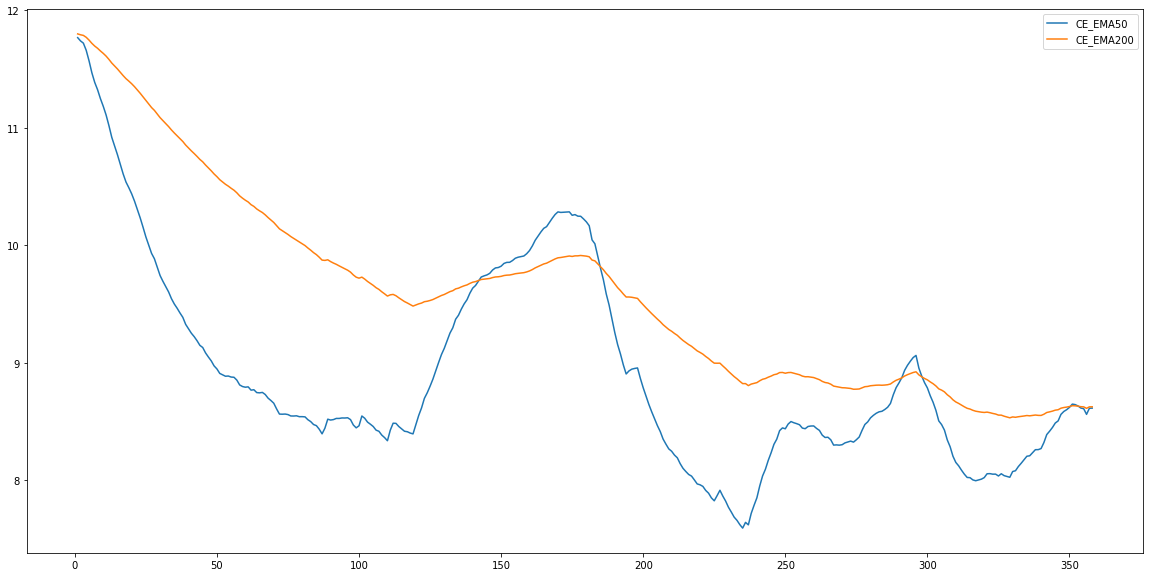

In [22]:
plot_ema(df[['ce_ema50']], df[['ce_ema200']])

In [20]:
# t = '2023-02-22 11:54:00'
t = datetime(2023, 2, 22, 11, 54)
number_of_stocks = 5
strategy_multiplier = 1
signal_type = 'S'
buy = 'BUY' #kite.TRANSACTION_TYPE_BUY
sell = 'SELL' #kite.TRANSACTION_TYPE_SELL
oms_data = [t, signal_type, 'N']

cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                    FROM {Market_Table} 
                    where tick_timestamp = %s and symbol != "BANKNIFTY" 
                    order by IV_CE desc limit %s''',(t, number_of_stocks))
stocks_res= cur.fetchall()
oms_stocks_data_temp = list(stocks_res)
oms_stocks_data_unaltered = oms_stocks_data_temp.copy()

cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                    FROM {Market_Table} 
                    where tick_timestamp = %s and symbol = "BANKNIFTY" ''',(t,))
nifty_res = cur.fetchall()
oms_nifty_data_temp = list(nifty_res)
oms_stocks_data_temp.extend(oms_nifty_data_temp)

margin_amt, oms_df = getMargin(oms_stocks_data_temp)
initial_total_margin = margin_amt['initial']['total']
final_total_margin = margin_amt['final']['total']
call_option_premium = margin_amt['initial']['option_premium']
put_option_premium = call_option_premium - margin_amt['final']['option_premium']

# initial_total_margin, final_total_margin, call_option_premium, put_option_premium
oms_data.extend([initial_total_margin, call_option_premium, put_option_premium])
oms_data.extend([number_of_stocks, strategy_multiplier])
oms_data.extend(list(map(lambda x: x[0], oms_stocks_data_unaltered)))
for i in range(10-len(oms_stocks_data_unaltered)):
  oms_data.extend([''])

ce_trades = []
pe_trades = []
ce_price = []
pe_price = []
for i in oms_df['symbol']:
      ce_avg_price, ce_trade_list = depth_ltp(oms_df[oms_df['symbol'] == i],CEorPE='ce')
      ce_price.append(ce_avg_price)
      ce_trades.append(ce_trade_list)
      pe_avg_price, pe_trade_list = depth_ltp(oms_df[oms_df['symbol'] == i],CEorPE='pe')
      pe_price.append(pe_avg_price)
      pe_trades.append(pe_trade_list)
print(ce_price)
print(pe_price)
oms_df['ce_avg_price'] = ce_price
oms_df['pe_avg_price'] = pe_price
oms_df['ce_trades'] = ce_trades
oms_df['pe_trades'] = pe_trades
oms_data.extend(oms_df['ce_avg_price'].iloc[:-1].values.tolist())
for i in range(10-len(oms_stocks_data_unaltered)):
  oms_data.extend([0])
oms_data.extend([oms_df['ce_avg_price'].iloc[-1]])
oms_data.extend(oms_df['pe_avg_price'].iloc[:-1].values.tolist())
for i in range(10-len(oms_stocks_data_unaltered)):
  oms_data.extend([0])
oms_data.extend([oms_df['pe_avg_price'].iloc[-1]])
oms_data.extend([None, None])
signal_id = t.strftime('%Y%m%d%H%M') + signal_type
oms_data.extend([signal_id])
oms_data.extend([None, None])
# cur.execute("INSERT INTO OMS_Data VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", oms_data)
cur.execute(f"INSERT INTO {OMS_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", oms_data)
conn.commit()

[5.866666666666666, 0.4, 0.65, 1.275, 0.95, 176.12575757575758]
[3.3, 0.65, 0.3, 3.05, 1.9, 227.4969696969697]


In [ ]:
oms_df

In [18]:
len(oms_data)

45

%s, %s, %s, %s, %s, %s,
%s, %s, %s, %s, %s, %s, 
%s, %s, %s, %s, %s, %s, 
%s, %s, %s, %s, %s, %s, 
%s, %s, %s, %s, %s, %s, 
%s, %s, %s, %s, %s, %s, 
%s, %s, %s, %s, %s, %s, 
%s, %s, %s

In [10]:
cur.execute(f"INSERT INTO {OMS_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", oms_data)
# conn.commit()

TypeError: ignored

In [ ]:
checkList=['NIFTY','RELIANCE', 'HDFCBANK',  'INFY',  'ICICIBANK',  'HDFC',  'TCS',  'KOTAKBANK',  'LT',  'SBIN',  'HINDUNILVR',  'AXISBANK',  'ITC',
  'BAJFINANCE',  'BHARTIARTL',  'ASIANPAINT',  'HCLTECH',  'MARUTI',  'TITAN',  'BAJAJFINSV',  'TATAMOTORS',  'TECHM',  'SUNPHARMA',
  'TATASTEEL',  'WIPRO',  'M&M',  'ULTRACEMCO',  'POWERGRID',  'HINDALCO',  'NTPC',  'NESTLEIND',  'GRASIM',  'ONGC',  'JSWSTEEL',  'DRREDDY',
  'ADANIPORTS',  'DIVISLAB',  'CIPLA',  'BAJAJ-AUTO',  'TATACONSUM',  'UPL',  'BRITANNIA',  'BPCL',  'EICHERMOT',  'HEROMOTOCO',  'COALINDIA',
  'ADANIENT',  'APOLLOHOSP',  'HDFCLIFE',  'INDUSINDBK',  'SBILIFE']


In [9]:
checkList=['BANKNIFTY', 'HDFCBANK', 'ICICIBANK', 'AXISBANK', 'KOTAKBANK', 'SBIN',
'INDUSINDBK', 'AUBANK', 'BANKBARODA', 'BANDHANBNK', 'FEDERALBNK', 'IDFCFIRSTB', 'PNB']

In [11]:
niftyindex[niftyindex['symbol'] == 'FEDERALBNK']

,symbol,weights,lots,steps,tick_timestamp,contract,FUT,ltp,start,atm,atm_num,CE,PE
contract,,,,,,,,,,,,,
NFO:FEDERALBNK23MAR,FEDERALBNK,2,5000,1,2023-02-24 09:26:00,NFO:FEDERALBNK23MAR,NFO:FEDERALBNK23MARFUT,129.3,0,129,129.0,NFO:FEDERALBNK23MAR129CE,NFO:FEDERALBNK23MAR129PE


In [10]:
for j in checkList:
  if not [i for i in ce_data.index if j in i]:
    print(j)

FEDERALBNK


In [ ]:
atmStrike(2525.05, 20, 15)

2535

In [ ]:
import re
re.find()

In [ ]:
ce_data.index

Index(['NFO:ADANIENT23FEB1800CE', 'NFO:ADANIPORTS23FEB580CE',
       'NFO:APOLLOHOSP23FEB4600CE', 'NFO:ASIANPAINT23FEB2800CE',
       'NFO:AXISBANK23FEB860CE', 'NFO:BAJAJ-AUTO23FEB3900CE',
       'NFO:BAJAJFINSV23FEB1420CE', 'NFO:BAJFINANCE23FEB6400CE',
       'NFO:BHARTIARTL23FEB790CE', 'NFO:BPCL23FEB330CE',
       'NFO:BRITANNIA23FEB4600CE', 'NFO:CIPLA23FEB1030CE',
       'NFO:COALINDIA23FEB214.75CE', 'NFO:DIVISLAB23FEB2850CE',
       'NFO:DRREDDY23FEB4500CE', 'NFO:EICHERMOT23FEB3250CE',
       'NFO:GRASIM23FEB1640CE', 'NFO:HCLTECH23FEB1110CE',
       'NFO:HDFC23FEB2680CE', 'NFO:HDFCBANK23FEB1660CE',
       'NFO:HDFCLIFE23FEB510CE', 'NFO:HINDALCO23FEB440CE',
       'NFO:HINDUNILVR23FEB2540CE', 'NFO:ICICIBANK23FEB870CE',
       'NFO:INDUSINDBK23FEB1140CE', 'NFO:INFY23FEB1600CE',
       'NFO:ITC23FEB382.5CE', 'NFO:JSWSTEEL23FEB730CE',
       'NFO:KOTAKBANK23FEB1780CE', 'NFO:LT23FEB2180CE', 'NFO:M&M23FEB1360CE',
       'NFO:MARUTI23FEB8800CE', 'NFO:NESTLEIND23FEB19000CE',
       'NFO:NI

In [ ]:
t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)#.strftime('%Y-%m-%d %H:%M')
if open_position:
  for position in open_position:
    cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
    ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
    ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
    pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
    pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                        FROM {Market_Table} 
                        where  symbol in (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, "NIFTY") 
                        order by tick_timestamp desc limit %s''',(*position[8:18], number_of_stocks+1))
    pnl_res= cur.fetchall()
    pnl_data = pnl_res

    margin_amt, pnl_df = getMargin(pnl_data)
    ce_trades = []
    pe_trades = []
    ce_price = []
    pe_price = []
    for i in pnl_df['symbol']:
        ce_avg_price, ce_trade_list = depth_ltp(pnl_df[pnl_df['symbol'] == i],CEorPE='ce')
        ce_price.append(ce_avg_price)
        ce_trades.append(ce_trade_list)
        pe_avg_price, pe_trade_list = depth_ltp(pnl_df[pnl_df['symbol'] == i],CEorPE='pe')
        pe_price.append(pe_avg_price)
        pe_trades.append(pe_trade_list)
      
    print(ce_price)
    print(pe_price)
    pnl_df['ce_avg_price'] = ce_price
    pnl_df['pe_avg_price'] = pe_price
    pnl_df['ce_trades'] = ce_trades
    pnl_df['pe_trades'] = pe_trades
    not_sufficient_qty = pnl_df[(pnl_df['ce_trades'] == {}) | (pnl_df['pe_trades'] == {})]['symbol'].values.tolist()
    if len(not_sufficient_qty) > 0:
      # query = 'UPDATE Market_Test set free_text_1 = "not sufficient quantity" where tick_timestamp = %s and symbol in ({})'.format(', '.join('%s' for _ in not_sufficient_qty), not_sufficient_qty)
      query1 = f'UPDATE {Market_Table} set free_text_1 = "not sufficient quantity" where tick_timestamp = %s and symbol in ({{}})'
      query = query1.format(', '.join('%s' for _ in not_sufficient_qty), not_sufficient_qty)
      cur.execute(query, (t, *not_sufficient_qty))
      conn.commit()
    open_position_df = pd.DataFrame(position)
    open_position_df = open_position_df.T
    open_position_df.columns = ['tick_timestamp', 'Signal_Type', 'Processed_Flg', 
    'margin_amount', 'buy_option_preminum', 'sell_option_premium', 'Number_of_stocks', 
    'strategy_multiplier', 'HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7', 'HV8', 'HV9', 
    'HV10', 'HV1_ce_avg', 'HV2_ce_avg', 'HV3_ce_avg', 'HV4_ce_avg', 'HV5_ce_avg', 'HV6_ce_avg', 
    'HV7_ce_avg', 'HV8_ce_avg', 'HV9_ce_avg', 'HV10_ce_avg', 'BANKNIFTY_ce_avg', 'HV1_pe_avg', 'HV2_pe_avg', 
    'HV3_pe_avg', 'HV4_pe_avg', 'HV5_pe_avg', 'HV6_pe_avg', 'HV7_pe_avg', 'HV8_pe_avg', 
    'HV9_pe_avg', 'HV10_pe_avg', 'BANKNIFTY_pe_avg', 'pnl', ' pnl_percentage', 'Signal_Id', 
    'Exit_Timestamp', 'free_text_3']
    signal_ltp_price_df = open_position_df[['HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7', 'HV8', 'HV9', 'HV10']]
    signal_ltp_price_df['BANKNIFTY'] = 'BANKNIFTY'
    entry_ltp = (signal_ltp_price_df.T).copy()
    entry_ltp.reset_index(inplace=True)
    entry_ltp.columns = ['index', 'symbol']
    entry_ltp['ce_avg_price'] = open_position_df[['HV1_ce_avg', 'HV2_ce_avg', 'HV3_ce_avg', 'HV4_ce_avg', 'HV5_ce_avg', 'HV6_ce_avg', 
    'HV7_ce_avg', 'HV8_ce_avg', 'HV9_ce_avg', 'HV10_ce_avg', 'BANKNIFTY_ce_avg']].T.reset_index()[0]
    entry_ltp['pe_avg_price'] = open_position_df[['HV1_pe_avg', 'HV2_pe_avg', 'HV3_pe_avg', 'HV4_pe_avg', 'HV5_pe_avg', 'HV6_pe_avg', 
    'HV7_pe_avg', 'HV8_pe_avg', 'HV9_pe_avg', 'HV10_pe_avg', 'BANKNIFTY_pe_avg']].T.reset_index()[0]
    entry_ltp.set_index('symbol', inplace=True) 
    cal_pnl_df = pnl_df[['symbol',    'ce_avg_price', 'pe_avg_price','position', 'qty']].copy()

    cal_pnl_df.set_index('symbol', inplace=True)
    current_pnl = entry_ltp[['ce_avg_price', 'pe_avg_price']] - cal_pnl_df[['ce_avg_price', 'pe_avg_price']]
    current_pnl.loc['NIFTY'] = current_pnl.loc['NIFTY']*-1
    pnl = (current_pnl.sum(axis = 1) * cal_pnl_df['qty']).sum()
    pnl_percent = pnl/position[3]*100 # in percent
    current_margin = margin_amt['initial']['total']
    # pnl_insert_data = [t, position[-3], pnl, pnl_percent, position[3], current_margin]202302142303S
    pnl_insert_data = [t, '202302142303S', pnl, pnl_percent, position[3], current_margin]
    pnl_insert_data.extend(entry_ltp['ce_avg_price'].values.tolist())
    pnl_insert_data.extend(entry_ltp['pe_avg_price'].values.tolist())
    cur.execute(f'INSERT INTO {PNL_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)', pnl_insert_data)
    conn.commit()
    print("--------------------------------")
    print(f'PNL: {pnl:.2f}, {pnl_percent:.4f}%, {position[3]:.2f}')
    print(f"Current Margin AMT: {current_margin:.4f}")
    print("--------------------------------")
    if pnl_percent > 0.5 or pnl_percent < -15:
      cur.execute(f'update {OMS_Table} set Processed_Flg= "Y", pnl = %s, pnl_percentage = %s, Exit_Timestamp = %s where tick_timestamp = %s', (pnl, pnl_percent, t, position[0]))
      conn.commit()

[9.0, 10.7, 3.15, 129.0375, 22.85, 5.4, 32.8, 48.0, 110.25, 25.15, 179.0]
[6.9, 8.0, 2.05, 137.3125, 21.0, 9.55, 25.4, 67.05, 98.15, 20.05, 170.05]
--------------------------------
PNL: 15276.25, 0.6420%, 2379647.89
Current Margin AMT: 2328496.7340
--------------------------------


In [ ]:
for t, s in zip(data_np[:, 0], data_np[:, 1]):
  up = t.strftime('%Y%m%d%H%M') + s
  cur.execute('update OMS_Test set Signal_Id = %s where tick_timestamp = %s', (up, t))
conn.commit()

In [ ]:
cur.execute('select tick_timestamp, Signal_Type from OMS_Test order by tick_timestamp desc')
data = cur.fetchall()
data_np = np.array(data)
data_np[:, 0]
list(map(lambda x: x[0].strftime('%Y%m%d%H%M') + x[1], zip(data_np[:, 0], data_np[:, 1])))


['202302141200S',
 '202302131258B',
 '202302131234S',
 '202302131113B',
 '202302131007S',
 '202302130945B',
 '202302101121S',
 '202302100917B',
 '202302091343S',
 '202302081520B',
 '202302081310S',
 '202302081306B',
 '202302040025B']

In [ ]:
pd.to_datetime(df[0].astype(str), format='%Y-%m-%d %H:%M')


0    2023-02-04 00:25:00
1    2023-02-08 13:06:00
2    2023-02-08 13:10:00
3    2023-02-08 15:20:00
4    2023-02-09 13:43:00
5    2023-02-10 09:17:00
6    2023-02-10 11:21:00
7    2023-02-13 09:45:00
8    2023-02-13 10:07:00
9    2023-02-13 11:13:00
10   2023-02-13 12:34:00
11   2023-02-13 12:58:00
12   2023-02-14 12:00:00
Name: 0, dtype: datetime64[ns]

In [ ]:
conn.commit()

In [ ]:
len(pnl_insert_data)

28

In [ ]:
for i in range(28):
  print('%s,', end=' ')

%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, 

In [ ]:
t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)
t.strftime('%Y%m%d%H%M') + signal_type

'202302142303S'

In [ ]:
t = datetime.now(timezone("Asia/Kolkata")).replace(second=0, microsecond=0, tzinfo=None)#.strftime('%Y-%m-%d %H:%M')
niftyindex = pd.DataFrame([niftyList, niftyWeightList, niftyLotList, niftyStepStrikeList]).T
niftyindex.columns = ['symbol', 'weights', 'lots', 'steps']
niftyindex['tick_timestamp'] = t
niftyindex['contract'] = niftyindex['symbol'].apply(lambda x: 'NFO:'+x+expiry)
niftyindex['FUT'] = niftyindex['contract']+'FUT'
niftyindex.sort_values('contract', axis=0, inplace=True)
niftyindex.index = niftyindex['contract']
ltp = pd.DataFrame(kite.quote(niftyindex['FUT'])).loc['last_price'].T
ltp.index = niftyindex.index
niftyindex['ltp'] = ltp
niftyindex['start']=0
niftyindex.loc[niftyindex['symbol']=='NTPC', 'start']  = 0.75
niftyindex.loc[niftyindex['symbol']=='COALINDIA', 'start']  = -0.25
atm = list(map(lambda x: atmStrike(x[0], step = x[1], start=x[2]), zip(niftyindex['ltp'], niftyindex['steps'], niftyindex['start'])))
niftyindex['atm'] = atm
niftyindex['atm'] = niftyindex['atm'].astype('str')
niftyindex['atm_num'] = niftyindex['atm'].apply(float)
niftyindex['CE'] = niftyindex['contract'] + niftyindex['atm'] + 'CE'
niftyindex['PE'] = niftyindex['contract'] + niftyindex['atm'] + 'PE'

ce_quote = kite.quote(niftyindex['CE'])
pe_quote = kite.quote(niftyindex['PE'])
ce_df = pd.DataFrame(ce_quote)
pe_df = pd.DataFrame(pe_quote)
ce_data = ce_df.loc[['last_price', 'average_price','buy_quantity', 'sell_quantity', 'volume', 'oi']].T
ce_data.index = niftyindex.index
pe_data = pe_df.loc[['last_price', 'average_price','buy_quantity', 'sell_quantity', 'volume', 'oi']].T
pe_data.index = niftyindex.index
niftyindex[['ce_ltp', 'ce_avg_price','ce_buy_quantity', 'ce_sell_quantity', 'ce_volume', 'ce_oi']] = ce_data
niftyindex[['pe_ltp', 'pe_avg_price','pe_buy_quantity', 'pe_sell_quantity', 'pe_volume', 'pe_oi']] = pe_data

# ----------------------------------------------------------------------------------------------
# IV Diff calculation from SPOT
# uderlying_ltp = kite.quote(f'NSE:{ticker}')[f'NSE:{ticker}']['last_price']
# niftyindex['spot_ticker'] = 'NSE:'+niftyindex['symbol']
# niftyindex.loc[niftyindex['symbol'] == 'NIFTY', 'spot_ticker'] = 'NSE:NIFTY 50'
# uderlying_ltp = pd.DataFrame(kite.quote(niftyindex['spot_ticker'])).loc['last_price'].T
# uderlying_ltp.index = niftyindex.index
# niftyindex['spot'] = uderlying_ltp
# ----------------------------------------------------------------------------------------------

expires_in = expiry_in_days(date.today())
IV_CE = list(map(lambda x: find_iv_newton('C', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['ltp'], niftyindex['atm_num'],niftyindex['ce_ltp'])))
IV_PE = list(map(lambda x: find_iv_newton('P', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['ltp'], niftyindex['atm_num'],niftyindex['pe_ltp'])))
# IV_CE = list(map(lambda x: find_iv_newton('C', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['spot'], niftyindex['atm_num'],niftyindex['ce_ltp'])))
# IV_PE = list(map(lambda x: find_iv_newton('P', x[0], x[1], 0.0732, expires_in, x[2]), zip(niftyindex['spot'], niftyindex['atm_num'],niftyindex['pe_ltp'])))
niftyindex['IV_CE'] = IV_CE
niftyindex['IV_PE'] = IV_PE

ce_depth = pd.DataFrame(list(map(lambda x: flatten_dict(x, quote=ce_quote), niftyindex['CE'])))
ce_depth.columns = ["ce_buy_price1", "ce_buy_qty1", "ce_buy_orders1", "ce_buy_price2", "ce_buy_qty2", "ce_buy_orders2", "ce_buy_price3", "ce_buy_qty3", "ce_buy_orders3", "ce_buy_price4", "ce_buy_qty4", "ce_buy_orders4", "ce_buy_price5", "ce_buy_qty5", "ce_buy_orders5", "ce_sell_price1", "ce_sell_qty1", "ce_sell_orders1", "ce_sell_price2", "ce_sell_qty2", "ce_sell_orders2", "ce_sell_price3", "ce_sell_qty3", "ce_sell_orders3", "ce_sell_price4", "ce_sell_qty4", "ce_sell_orders4", "ce_sell_price5", "ce_sell_qty5", "ce_sell_orders5"]
ce_depth.index = niftyindex.index
niftyindex[ce_depth.columns] = ce_depth

pe_depth = pd.DataFrame(list(map(lambda x: flatten_dict(x, quote=pe_quote), niftyindex['PE'])))
pe_depth.columns = ["pe_buy_price1", "pe_buy_qty1", "pe_buy_orders1", "pe_buy_price2", "pe_buy_qty2", "pe_buy_orders2", "pe_buy_price3", "pe_buy_qty3", "pe_buy_orders3", "pe_buy_price4", "pe_buy_qty4", "pe_buy_orders4", "pe_buy_price5", "pe_buy_qty5", "pe_buy_orders5", "pe_sell_price1", "pe_sell_qty1", "pe_sell_orders1", "pe_sell_price2", "pe_sell_qty2", "pe_sell_orders2", "pe_sell_price3", "pe_sell_qty3", "pe_sell_orders3", "pe_sell_price4", "pe_sell_qty4", "pe_sell_orders4", "pe_sell_price5", "pe_sell_qty5", "pe_sell_orders5"]
pe_depth.index = niftyindex.index
niftyindex[pe_depth.columns] = pe_depth
niftyindex['free_text_1'] = 0
niftyindex['free_text_2'] = 0

In [ ]:
niftyindex.loc['NFO:HINDALCO23FEB', 'IV_PE'] = np.nan

In [ ]:
nans = niftyindex[niftyindex['IV_CE'].isnull()].index.tolist()
for nan in nans:
  print(t, 'CE NaNs in', niftyindex.loc[nan, 'symbol'])
  cur.execute(f'select IV_CE from {Market_Table} where symbol = %s and tick_timestamp < %s limit 1', (niftyindex.loc[nan, 'symbol'], t))
  previous_val = cur.fetchone()[0]
  niftyindex.loc[nan, 'IV_CE'] = previous_val
nans = niftyindex[niftyindex['IV_PE'].isnull()].index.tolist()
for nan in nans:
  print(t, 'PE NaNs in', niftyindex.loc[nan, 'symbol'])
  cur.execute(f'select IV_PE from {Market_Table} where symbol = %s and tick_timestamp < %s limit 1', (niftyindex.loc[nan, 'symbol'], t))
  previous_val = cur.fetchone()[0]
  niftyindex.loc[nan, 'IV_PE'] = previous_val

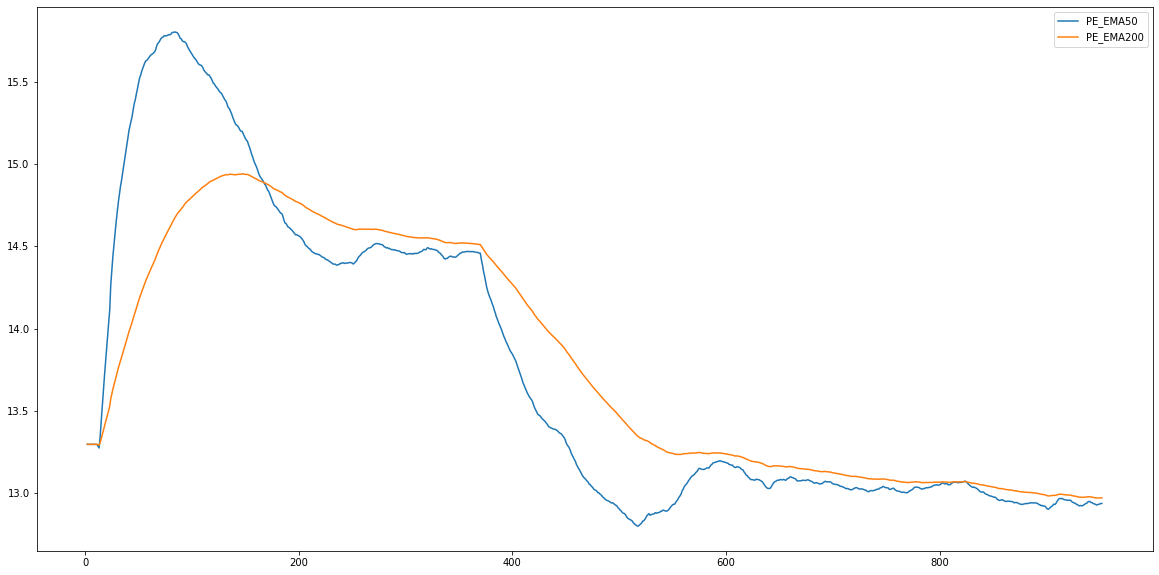

In [ ]:
df = crossover(df, typ='pe')
plot_ema(df[['pe_ema50']], df[['pe_ema200']])

In [ ]:
ntpc = niftyindex.loc[niftyindex['symbol']=='NTPC', 'ltp'].values.item()

st1 = float(atmStrike(ntpc, 2.5))
st2 = float(atmStrike(ntpc, 2.5, 0.75))
if (st1 + st2)/2 < ntpc:
  print(str(st1))
  q, r = divmod(st1, 1)
  if r == 0:
    print(str(int(q)))
  else:
    print(str(st1))
else:
  print(str(st2))
  q, r = divmod(st2, 1)
  if r == 0:
    print(str(int(q)))
  else:
    print(str(st2))

165.75


In [ ]:
cur.execute(f'Select * FROM {OMS_Table} where processed_flg ="N"')
open_position =cur.fetchall()
check = list(open_position[0])
number_of_stocks = 5
nn = 10 - number_of_stocks
for i in range(nn):
  check[17-i] = ''
  check[27-i] = 0
  check[38-i] = 0

In [ ]:
oms_data

In [ ]:
open_position = [tuple(oms_data)]

In [ ]:
open_position[0][8:18]

('ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'EICHERMOT',
 'INDUSINDBK',
 'SBIN',
 'TATAMOTORS',
 'ONGC',
 'GRASIM',
 'HINDALCO')

In [ ]:
# number_of_stocks = 5
if open_position:
  for position in open_position:
    cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
    ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
    ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
    pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
    pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                        FROM {Market_Table} 
                        where  symbol in (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, "NIFTY") 
                        order by tick_timestamp desc limit %s''',(*position[8:18], number_of_stocks+1))
    pnl_res= cur.fetchall()
    pnl_data = pnl_res

    margin_amt, pnl_df = getMargin(pnl_data)
    ce_trades = []
    pe_trades = []
    ce_price = []
    pe_price = []
    for i in pnl_df['symbol']:
        ce_avg_price, ce_trade_list = depth_ltp(pnl_df[pnl_df['symbol'] == i],CEorPE='ce')
        ce_price.append(ce_avg_price)
        ce_trades.append(ce_trade_list)
        pe_avg_price, pe_trade_list = depth_ltp(pnl_df[pnl_df['symbol'] == i],CEorPE='pe')
        pe_price.append(pe_avg_price)
        pe_trades.append(pe_trade_list)
      
    print(ce_price)
    print(pe_price)
    pnl_df['ce_avg_price'] = ce_price
    pnl_df['pe_avg_price'] = pe_price
    pnl_df['ce_trades'] = ce_trades
    pnl_df['pe_trades'] = pe_trades
    # not_sufficient_qty = pnl_df[(pnl_df['ce_trades'] == {}) | (pnl_df['pe_trades'] == {})]['symbol'].values.tolist()
    # if len(not_sufficient_qty) > 0:
    #   # query = 'UPDATE Market_Test set free_text_1 = "not sufficient quantity" where tick_timestamp = %s and symbol in ({})'.format(', '.join('%s' for _ in not_sufficient_qty), not_sufficient_qty)
    #   query1 = f'UPDATE {Market_Table} set free_text_1 = "not sufficient quantity" where tick_timestamp = %s and symbol in ({{}})'
    #   query = query1.format(', '.join('%s' for _ in not_sufficient_qty), not_sufficient_qty)
    #   cur.execute(query, (t, *not_sufficient_qty))
    #   conn.commit()
    open_position_df = pd.DataFrame(position)
    open_position_df = open_position_df.T
    open_position_df.columns = ['tick_timestamp', 'Signal_Type', 'Processed_Flg', 
    'margin_amount', 'buy_option_preminum', 'sell_option_premium', 'Number_of_stocks', 
    'strategy_multiplier', 'HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7', 'HV8', 'HV9', 
    'HV10', 'HV1_ce_avg', 'HV2_ce_avg', 'HV3_ce_avg', 'HV4_ce_avg', 'HV5_ce_avg', 'HV6_ce_avg', 
    'HV7_ce_avg', 'HV8_ce_avg', 'HV9_ce_avg', 'HV10_ce_avg', 'NIFTY_ce_avg', 'HV1_pe_avg', 'HV2_pe_avg', 
    'HV3_pe_avg', 'HV4_pe_avg', 'HV5_pe_avg', 'HV6_pe_avg', 'HV7_pe_avg', 'HV8_pe_avg', 
    'HV9_pe_avg', 'HV10_pe_avg', 'NIFTY_pe_avg', 'pnl', ' pnl_percentage', 'free_text_1', 
    'free_text_2', 'free_text_3']
    signal_ltp_price_df = open_position_df[['HV1', 'HV2', 'HV3', 'HV4', 'HV5', 'HV6', 'HV7', 'HV8', 'HV9', 'HV10']]
    signal_ltp_price_df['NIFTY'] = 'NIFTY'
    entry_ltp = (signal_ltp_price_df.T).copy()
    entry_ltp.reset_index(inplace=True)
    entry_ltp.columns = ['index', 'symbol']
    entry_ltp['ce_avg_price'] = open_position_df[['HV1_ce_avg', 'HV2_ce_avg', 'HV3_ce_avg', 'HV4_ce_avg', 'HV5_ce_avg', 'HV6_ce_avg', 
    'HV7_ce_avg', 'HV8_ce_avg', 'HV9_ce_avg', 'HV10_ce_avg', 'NIFTY_ce_avg']].T.reset_index()[0]
    entry_ltp['pe_avg_price'] = open_position_df[['HV1_pe_avg', 'HV2_pe_avg', 'HV3_pe_avg', 'HV4_pe_avg', 'HV5_pe_avg', 'HV6_pe_avg', 
    'HV7_pe_avg', 'HV8_pe_avg', 'HV9_pe_avg', 'HV10_pe_avg', 'NIFTY_pe_avg']].T.reset_index()[0]
    entry_ltp.set_index('symbol', inplace=True) 
    cal_pnl_df = pnl_df[['symbol',    'ce_avg_price', 'pe_avg_price','position', 'qty']].copy()
    cal_pnl_df.set_index('symbol', inplace=True)
    current_pnl = entry_ltp[['ce_avg_price', 'pe_avg_price']] - cal_pnl_df[['ce_avg_price', 'pe_avg_price']]
    current_pnl.loc['NIFTY'] = current_pnl.loc['NIFTY']*-1
    pnl = (current_pnl.sum(axis = 1) * cal_pnl_df['qty']).sum()
    pnl_percent = pnl/position[3]*100 # in percent
    print("----------------------------")
    print(f'PNL: {pnl:.2f}, {pnl_percent:.4f}%, {position[3]:.2f}')
    print(f"Current Margin AMT: {margin_amt['initial']['total']:.4f}")
    print("----------------------------")
    # if pnl_percent > 1.4 or pnl_percent < -0.7:
      # cur.execute(f'update {OMS_Table} set Processed_Flg= "Y", pnl = %s, pnl_percentage = %s where tick_timestamp = %s', (pnl, pnl_percent, position[0].strftime("%Y-%m-%d %H:%M:%S")))
      # conn.commit()

[9.0, 10.7, 3.15, 129.0375, 22.85, 5.4, 32.8, 48.0, 110.25, 25.15, 179.0]
[6.9, 8.0, 2.05, 137.3125, 21.0, 9.55, 25.4, 67.05, 98.15, 20.05, 170.05]
----------------------------
PNL: 15276.25, 0.6420%, 2379647.89
Current Margin AMT: 2328496.7340
----------------------------


In [ ]:
entry_ltp['ce_avg_price'].values.tolist()

[190.05,
 25.0,
 108.55,
 66.65,
 19.35,
 10.383333333333333,
 9.15,
 2.1,
 28.15,
 8.65,
 130.49166666666667]

In [ ]:
entry_ltp['pe_avg_price'].values.tolist()

[166.4,
 25.35,
 99.65,
 75.55,
 24.1,
 9.316666666666666,
 7.2,
 3.4,
 28.15,
 6.6,
 136.1125]

In [ ]:
# t = '2023-02-04 00:24:00'
t = '2023-02-14 12:00:00'
number_of_stocks = 10
strategy_multiplier = 1
signal_type = 'S'
buy = 'BUY' #kite.TRANSACTION_TYPE_BUY
sell = 'SELL' #kite.TRANSACTION_TYPE_SELL
oms_data = [t, signal_type, 'N']

cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                    FROM {Market_Table} 
                    where tick_timestamp = %s and symbol != "NIFTY" 
                    order by IV_CE desc limit %s''',(t, number_of_stocks))
stocks_res= cur.fetchall()
oms_stocks_data_temp = list(stocks_res)
oms_stocks_data_unaltered = oms_stocks_data_temp.copy()

cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                    FROM {Market_Table} 
                    where tick_timestamp = %s and symbol = "NIFTY" ''',(t,))
nifty_res = cur.fetchall()
oms_nifty_data_temp = list(nifty_res)
oms_stocks_data_temp.extend(oms_nifty_data_temp)


margin_amt, oms_df = getMargin(oms_stocks_data_temp)
initial_total_margin = margin_amt['initial']['total']
final_total_margin = margin_amt['final']['total']
call_option_premium = margin_amt['initial']['option_premium']
put_option_premium = call_option_premium - margin_amt['final']['option_premium']

# # initial_total_margin, final_total_margin, call_option_premium, put_option_premium
oms_data.extend([initial_total_margin, call_option_premium, put_option_premium])
oms_data.extend([number_of_stocks, strategy_multiplier])
oms_data.extend(list(map(lambda x: x[0], oms_stocks_data_unaltered)))
for i in range(10-len(oms_stocks_data_unaltered)):
  oms_data.extend([''])

ce_trades = []
pe_trades = []
ce_price = []
pe_price = []
for i in oms_df['symbol']:
      ce_avg_price, ce_trade_list = depth_ltp(oms_df[oms_df['symbol'] == i],CEorPE='ce')
      ce_price.append(ce_avg_price)
      ce_trades.append(ce_trade_list)
      pe_avg_price, pe_trade_list = depth_ltp(oms_df[oms_df['symbol'] == i],CEorPE='pe')
      pe_price.append(pe_avg_price)
      pe_trades.append(pe_trade_list)
print(ce_price)
print(pe_price)
oms_df['ce_avg_price'] = ce_price
oms_df['pe_avg_price'] = pe_price
oms_df['ce_trades'] = ce_trades
oms_df['pe_trades'] = pe_trades
oms_data.extend(oms_df['ce_avg_price'].iloc[:-1].values.tolist())
for i in range(10-len(oms_stocks_data_unaltered)):
  oms_data.extend([0])
oms_data.extend([oms_df['ce_avg_price'].iloc[-1]])
oms_data.extend(oms_df['pe_avg_price'].iloc[:-1].values.tolist())
for i in range(10-len(oms_stocks_data_unaltered)):
  oms_data.extend([0])
oms_data.extend([oms_df['pe_avg_price'].iloc[-1]])
oms_data.extend([None,None,None, None, None])
# cur.execute("INSERT INTO OMS_Data VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", oms_data)
# cur.execute(f"INSERT INTO {OMS_Table} VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", oms_data)
# conn.commit()

[190.05, 25.0, 108.55, 66.65, 19.35, 10.383333333333333, 9.15, 2.1, 28.15, 8.65, 130.49166666666667]
[166.4, 25.35, 99.65, 75.55, 24.1, 9.316666666666666, 7.2, 3.4, 28.15, 6.6, 136.1125]


In [ ]:
oms_data

['2023-02-14 12:00:00',
 'S',
 'N',
 2379647.88775,
 147150,
 412068.75,
 10,
 1,
 'ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'EICHERMOT',
 'INDUSINDBK',
 'SBIN',
 'TATAMOTORS',
 'ONGC',
 'GRASIM',
 'HINDALCO',
 190.05,
 25.0,
 108.55,
 66.65,
 19.35,
 10.383333333333333,
 9.15,
 2.1,
 28.15,
 8.65,
 130.49166666666667,
 166.4,
 25.35,
 99.65,
 75.55,
 24.1,
 9.316666666666666,
 7.2,
 3.4,
 28.15,
 6.6,
 136.1125,
 None,
 None,
 None,
 None,
 None]

In [ ]:
for i in range(10-len(oms_stocks_data_unaltered)):
  oms_data.extend('')

In [ ]:
len(oms_stocks_data_unaltered)

10

In [ ]:
cur.execute(f'SELECT * FROM {OMS_Table}')
res = cur.fetchall()
df = pd.DataFrame(res)
df

""


In [ ]:
cur.execute(f'select * from (SELECT * FROM {IV_Table} order by tick_timestamp desc limit 2000) as T order by tick_timestamp asc')
res = cur.fetchall()
df = pd.DataFrame(res)
df.columns = ['time', 'ce_iv_diff', 'pe_iv_diff']
df = crossover(df)

t = '2023-02-01 23:50:00'
number_of_stocks = 10
strategy_multiplier = 1
signal_type = 'B'
buy = 'BUY' #kite.TRANSACTION_TYPE_BUY
sell = 'SELL' #kite.TRANSACTION_TYPE_SELL
oms_data = [t, signal_type, 'N']


cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                    FROM {Market_Table} 
                    where tick_timestamp = %s and symbol != "NIFTY" 
                    order by IV_CE desc limit %s''',(t, number_of_stocks))
stocks_res= cur.fetchall()
oms_stocks_data_temp = list(stocks_res)
oms_stocks_data_unaltered = oms_stocks_data_temp.copy()

cur.execute(f'''SELECT symbol, ltp, lots, weights, steps, contract, atm_num, ce_ltp, pe_ltp,
ce_buy_price1, ce_buy_qty1, ce_buy_price2, ce_buy_qty2, ce_buy_price3, ce_buy_qty3, ce_buy_price4, ce_buy_qty4, ce_buy_price5, ce_buy_qty5,
ce_sell_price1, ce_sell_qty1, ce_sell_price2, ce_sell_qty2, ce_sell_price3, ce_sell_qty3, ce_sell_price4, ce_sell_qty4, ce_sell_price5, ce_sell_qty5,
pe_buy_price1, pe_buy_qty1, pe_buy_price2, pe_buy_qty2, pe_buy_price3, pe_buy_qty3, pe_buy_price4, pe_buy_qty4, pe_buy_price5, pe_buy_qty5, 
pe_sell_price1, pe_sell_qty1, pe_sell_price2, pe_sell_qty2, pe_sell_price3, pe_sell_qty3, pe_sell_price4, pe_sell_qty4, pe_sell_price5, pe_sell_qty5
                    FROM {Market_Table} 
                    where tick_timestamp = %s and symbol = "NIFTY" ''',(t,))
nifty_res = cur.fetchall()
oms_nifty_data_temp = list(nifty_res)
oms_stocks_data_temp.extend(oms_nifty_data_temp)


margin_amt, oms_df = getMargin(oms_stocks_data_temp)

In [ ]:
# niftyindex[niftyindex['symbol'] == 'NIFTY']['spot_ticker'] = 'NSE:NIFTY 50'
niftyindex.loc[niftyindex['symbol'] == 'NIFTY', 'spot_ticker'] = 'NSE:NIFTY 50'
niftyindex[niftyindex['symbol'] == 'NIFTY']

,symbol,weights,lots,steps,tick_timestamp,contract,FUT,ltp,atm,atm_num,...,ce_sell_quantity,ce_volume,ce_oi,pe_ltp,pe_avg_price,pe_buy_quantity,pe_sell_quantity,pe_volume,pe_oi,spot_ticker
contract,,,,,,,,,,,,,,,,,,,,,
NFO:NIFTY23FEB,NIFTY,100,50,50,2023-02-01 23:35:00,NFO:NIFTY23FEB,NFO:NIFTY23FEBFUT,17665,17650,17650.0,...,7100,382950,147000,286.85,208.59,10050,4250,469850,113400,NSE:NIFTY 50


In [ ]:
cur.execute(f'Select * FROM {IV_Table}')
open_position =cur.fetchall()
open_position

()

In [ ]:
ticker = 'HDFCBANK'
uderlying_ltp = kite.quote(f'NSE:{ticker}')[f'NSE:{ticker}']['last_price']
step = 10
CEPE = 'CE'
atm = atmStrike(uderlying_ltp, step=step)
nfo = f'NFO:{ticker}23FEB{atm}{CEPE}'
nfo_ltp = kite.quote(nfo)[nfo]['last_price']
if CEPE == 'CE':
  CP = 'C'
else:
  CP = 'P'
find_iv_newton(CP, uderlying_ltp, float(atm), 0.0735, expiry_in_days(date.today()), nfo_ltp)

0.20776923145252943

In [ ]:
atmStrike(uderlying_ltp, step=step)

'362.5'

In [ ]:
kite.quote(f'NFO:{ticker}23FEB{atmStrike(uderlying_ltp, step=step)}{CEPE}')

{'NFO:NESTLEIND23FEB19000PE': {'instrument_token': 24680706,
  'timestamp': datetime.datetime(2023, 2, 1, 16, 55, 2),
  'last_trade_time': datetime.datetime(2023, 2, 1, 15, 24, 40),
  'last_price': 263.35,
  'last_quantity': 40,
  'buy_quantity': 3520,
  'sell_quantity': 1840,
  'volume': 3600,
  'average_price': 286.16,
  'oi': 5880,
  'oi_day_high': 6120,
  'oi_day_low': 5480,
  'net_change': 0,
  'lower_circuit_limit': 0.05,
  'upper_circuit_limit': 670.05,
  'ohlc': {'open': 260, 'high': 345.75, 'low': 250, 'close': 280.4},
  'depth': {'buy': [{'price': 241.85, 'quantity': 40, 'orders': 1},
    {'price': 241.8, 'quantity': 40, 'orders': 1},
    {'price': 205.2, 'quantity': 120, 'orders': 3},
    {'price': 200, 'quantity': 40, 'orders': 1},
    {'price': 189.25, 'quantity': 120, 'orders': 1}],
   'sell': [{'price': 285.9, 'quantity': 40, 'orders': 1},
    {'price': 285.95, 'quantity': 40, 'orders': 1},
    {'price': 337.35, 'quantity': 120, 'orders': 1},
    {'price': 360, 'quantity

In [ ]:
kite.quote('NSE:NIFTY 50')

{'NSE:NIFTY 50': {'instrument_token': 256265,
  'tradingsymbol': 'NIFTY 50',
  'timestamp': datetime.datetime(2023, 2, 1, 17, 52, 49),
  'last_price': 17616.3,
  'net_change': -45.85,
  'ohlc': {'open': 17811.6,
   'high': 17972.2,
   'low': 17353.4,
   'close': 17662.15}}}